In [1]:
import time

In [2]:
time.strftime('%c', time.localtime(time.time()))

'Wed Jul 14 10:25:15 2021'

In [3]:
import numpy as np

In [4]:
import pandas as pd

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [7]:
%matplotlib inline

In [8]:
titanic_df = pd.read_csv('/data/train.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/data/train.csv'

In [9]:
titanic_df = pd.read_csv('data/train.csv')

In [10]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
titanic_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [13]:
type(titanic_df['Age'])

pandas.core.series.Series

In [14]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)

In [15]:
titanic_df['Cabin'].fillna('N', inplace = True)

In [16]:
titanic_df['Embarked'].fillna('N', inplace = True)

In [17]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [18]:
titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [19]:
titanic_df['Cabin'].value_counts()

N              687
B96 B98          4
G6               4
C23 C25 C27      4
F33              3
              ... 
E46              1
D11              1
D6               1
B41              1
C91              1
Name: Cabin, Length: 148, dtype: int64

In [20]:
titanic_df['Embarked'].value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [21]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]

In [22]:
titanic_df['Cabin']

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object

In [23]:
titanic_df['Cabin'].value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [24]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [25]:
titanic_df.groupby(['Sex', 'Survived'])

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

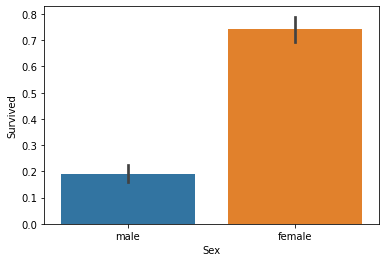

In [26]:
sns.barplot(x = 'Sex', y = 'Survived', data = titanic_df)

In [27]:
sns.barplot(x = 'PClass', y = 'Survived', data = titanic_df)

ValueError: Could not interpret input 'PClass'

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

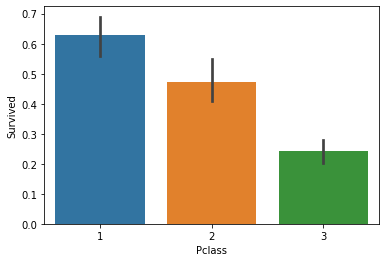

In [28]:
sns.barplot(x = 'Pclass', y = 'Survived', data = titanic_df)

In [29]:
titanic_df.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [30]:
sns.parplot(x = 'Pclass', y = 'Survived', data = titanic_df)

AttributeError: module 'seaborn' has no attribute 'parplot'

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

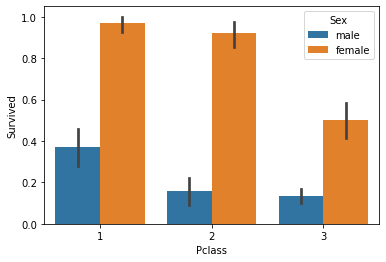

In [31]:
sns.barplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = titanic_df)

In [32]:
f

NameError: name 'f' is not defined

In [33]:
def get_category(age):
    cat = ''
    if age <= -1:
        cat = 'Unknown'
    elif age <= 5:
        cat = 'Baby'
    elif age <= 12:
        cat = 'Child'
    elif age <= 18:
        cat = 'Teenager'
    elif age <= 25:
        cat = 'Student'
    elif age <= 35:
        cat = 'Young adult'
    elif age <= 60:
        cat = 'Adult'
    else:
        cat = 'Elderly'
    return cat

In [34]:
get_category(1)

'Baby'

In [35]:
get_category(13)

'Teenager'

In [36]:
plt.figure(figsize = (10, 6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [37]:
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young adult', 'Adult', 'Elderly']

In [38]:
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))

In [39]:
titanic_df['Age_cat']

0          Student
1            Adult
2      Young adult
3      Young adult
4      Young adult
          ...     
886    Young adult
887        Student
888    Young adult
889    Young adult
890    Young adult
Name: Age_cat, Length: 891, dtype: object

AttributeError: 'Rectangle' object has no property 'orders'

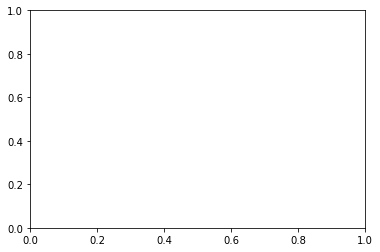

In [40]:
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, orders = group_names)

<AxesSubplot:xlabel='Age_cat', ylabel='Survived'>

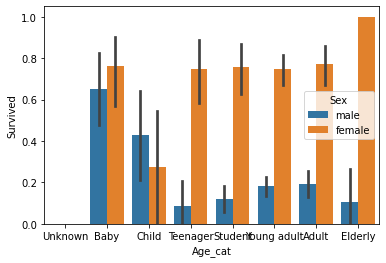

In [41]:
sns.barplot(x = 'Age_cat', y = 'Survived', hue = 'Sex', data = titanic_df, order = group_names)

In [42]:
titanic_df.drop('Age_cat', axis = 1, inplace = True)

In [43]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,N,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,N,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,N,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,C


In [44]:
from sklearn import preprocessing

In [45]:
def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

In [46]:
titanic_df = encode_features(titanic_df)

In [47]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,7,3
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,1,3
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,7,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,2,0


In [48]:
titainic_df.drop(['Name'])

NameError: name 'titainic_df' is not defined

In [49]:
titanic_df.drop(['Name'])

KeyError: "['Name'] not found in axis"

In [50]:
titanic_df.drop('Name')

KeyError: "['Name'] not found in axis"

In [51]:
titanic_df.drop('Name', axis = 1, inplace = True)

In [52]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,A/5 21171,7.2500,7,3
1,2,1,1,0,38.000000,1,0,PC 17599,71.2833,2,0
2,3,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,0,35.000000,1,0,113803,53.1000,2,3
4,5,0,3,1,35.000000,0,0,373450,8.0500,7,3
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,211536,13.0000,7,3
887,888,1,1,0,19.000000,0,0,112053,30.0000,1,3
888,889,0,3,0,29.699118,1,2,W./C. 6607,23.4500,7,3
889,890,1,1,1,26.000000,0,0,111369,30.0000,2,0


In [53]:
titanic_df.drop('Ticket', axis = 1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,7,3
1,2,1,1,0,38.000000,1,0,71.2833,2,0
2,3,1,3,0,26.000000,0,0,7.9250,7,3
3,4,1,1,0,35.000000,1,0,53.1000,2,3
4,5,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,7,3
887,888,1,1,0,19.000000,0,0,30.0000,1,3
888,889,0,3,0,29.699118,1,2,23.4500,7,3
889,890,1,1,1,26.000000,0,0,30.0000,2,0


In [54]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,A/5 21171,7.2500,7,3
1,2,1,1,0,38.000000,1,0,PC 17599,71.2833,2,0
2,3,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,0,35.000000,1,0,113803,53.1000,2,3
4,5,0,3,1,35.000000,0,0,373450,8.0500,7,3
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,211536,13.0000,7,3
887,888,1,1,0,19.000000,0,0,112053,30.0000,1,3
888,889,0,3,0,29.699118,1,2,W./C. 6607,23.4500,7,3
889,890,1,1,1,26.000000,0,0,111369,30.0000,2,0


In [55]:
titanic_df.drop('Ticket', axis = 1, inplace = True)

In [56]:
titanic

NameError: name 'titanic' is not defined

In [57]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,7,3
1,2,1,1,0,38.000000,1,0,71.2833,2,0
2,3,1,3,0,26.000000,0,0,7.9250,7,3
3,4,1,1,0,35.000000,1,0,53.1000,2,3
4,5,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,7,3
887,888,1,1,0,19.000000,0,0,30.0000,1,3
888,889,0,3,0,29.699118,1,2,23.4500,7,3
889,890,1,1,1,26.000000,0,0,30.0000,2,0


In [58]:
titanic_df.drop('PassergerId', axis = 1, inplace = True)

KeyError: "['PassergerId'] not found in axis"

In [59]:
titanic_df.drop('PassengerId', axis = 1, inplace = True)

In [60]:
titanic_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,7,3
1,1,1,0,38.000000,1,0,71.2833,2,0
2,1,3,0,26.000000,0,0,7.9250,7,3
3,1,1,0,35.000000,1,0,53.1000,2,3
4,0,3,1,35.000000,0,0,8.0500,7,3
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,7,3
887,1,1,0,19.000000,0,0,30.0000,1,3
888,0,3,0,29.699118,1,2,23.4500,7,3
889,1,1,1,26.000000,0,0,30.0000,2,0


In [61]:
y_titanic_df = titanic_df['Survived']

In [62]:
x_titanic_df = titanic_df.drop('Survived', axis = 1)

In [63]:
from sklearn.model_selection import train_test_split


In [64]:
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df. test_size = 0.2, random_state = 11)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-64-5374bff2bdc2>, line 1)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size = 0.2, random_state = 11)

In [66]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
333,3,1,16.0,2,0,18.0000,7,3
662,1,1,47.0,0,0,25.5875,4,3
382,3,1,32.0,0,0,7.9250,7,3
331,1,1,45.5,0,0,28.5000,2,3
149,2,1,42.0,0,0,13.0000,7,3
...,...,...,...,...,...,...,...,...
269,1,0,35.0,0,0,135.6333,2,3
337,1,0,41.0,0,0,134.5000,4,0
91,3,1,20.0,0,0,7.8542,7,3
80,3,1,22.0,0,0,9.0000,7,3


In [67]:
x_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
431,3,0,29.699118,1,0,16.1000,7,3
821,3,1,27.000000,0,0,8.6625,7,3
629,3,1,29.699118,0,0,7.7333,7,2
626,2,1,57.000000,0,0,12.3500,7,2
665,2,1,32.000000,2,0,73.5000,7,3
...,...,...,...,...,...,...,...,...
638,3,0,41.000000,0,5,39.6875,7,3
771,3,1,48.000000,0,0,7.8542,7,3
521,3,1,22.000000,0,0,7.8958,7,3
711,1,1,29.699118,0,0,26.5500,2,3


In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
from sklearn.metrics import accuraacy_score

ImportError: cannot import name 'accuraacy_score' from 'sklearn.metrics' (/Users/yunho/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/__init__.py)

In [72]:
from sklearn.metric import accuracy_score

ModuleNotFoundError: No module named 'sklearn.metric'

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
dt_clf = DecisionTreeClassifier(random_state = 11)

In [75]:
rf_clf = RandomForsetclassifier(random_state = 11)

NameError: name 'RandomForsetclassifier' is not defined

In [76]:
rf_clf = RandomForsetClassifier(random_state = 11)

NameError: name 'RandomForsetClassifier' is not defined

In [77]:
rf_clf = RandomForestClassifier(random_state = 11)

In [78]:
lr_clf = LogisticRegression()

In [79]:
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=11)

In [80]:
dt.pred(x_test)

NameError: name 'dt' is not defined

In [81]:
dt_clf.pred(x_test)

AttributeError: 'DecisionTreeClassifier' object has no attribute 'pred'

In [82]:
dt_pred = dt_clf.predict(x_test)

In [83]:
print('DecisionTreeClassifier accuracy : {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier accuracy : 0.7877
